# Finance & Accounting Courses in udemy.com
## Includes:
* id
* title
* is_paid
* num_subscribers
* rating
* num_reviews
* created

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('jilkothari/finance-accounting-courses-udemy-13k-course', path='.', unzip=True)

courses = pd.read_csv('courses.csv')

## Dataset

In [13]:
courses

id                                              title  \
0       762616  the_complete_sql_bootcamp_2020:_go_from_zero_t...   
1       937678  tableau_2020_a-z:_hands-on_tableau_training_fo...   
2      1361790             pmp_exam_prep_seminar_-__pmbok_guide_6   
3       648826         the_complete_financial_analyst_course_2020   
4       637930  an_entire_mba_in_1_course:award_winning_busine...   
...        ...                                                ...   
13531  3171702  máster_en_inversión_bursátil,_completo_análisi...   
13532  2925096       curso_do_zero_a_investidor_em_ações_na_bolsa   
13533  3146788  day_trading_kumo-méthode_de_trading_range-_for...   
13534  2400574              investindo_do_zero_com_tesouro_direto   
13535  2888390          acabou_a_previdência_e_agora?_-_volume_01   

                                                     url  is_paid  \
0                     /course/the-complete-sql-bootcamp/     True   
1                                     /course/tableau10/     True   
2                            /course/pmp-pmbok6-35-pdus/     True   
3         /course/the-complete-financial-analyst-course/     True   
4      /course/an-entire-mba-in-1-courseaward-winning...     True   
...                                                  ...      ...   
13531  /course/master-en-inversion-bursatil-completo-...    False   
13532  /course/curso-do-zero-a-investidor-em-acoes-na...    False   
13533  /course/day-trading-kumo-methode-de-trading-ra...    False   
13534  /course/investindo-do-zero-com-tesouro-direto-...    False   
13535    /course/acabou-a-previdencia-e-agora-volume-01/    False   

       num_subscribers  rating  num_reviews               created  
0               295509     4.7        78006  2016-02-14T22:57:48Z  
1               209070     4.6        54581  2016-08-22T12:10:18Z  
2               155282     4.6        52653  2017-09-26T16:32:48Z  
3               245860     4.5        46447  2015-10-23T13:34:35Z  
4               374836     4.5        41630  2015-10-12T06:39:46Z  
...                ...     ...          ...                   ...  
13531              485     4.4           11  2020-05-26T17:34:49Z  
13532              260     4.2           11  2020-03-28T18:39:36Z  
13533              121     4.1           10  2020-05-19T17:08:48Z  
13534              233     3.6           10  2019-06-05T23:08:57Z  
13535              175     4.5           10  2020-03-20T01:41:25Z  

[9501 rows x 8 columns]

## Delete redundant columns

In [3]:
imp_col = ['id', 'title', 'url', 'is_paid', 'num_subscribers', 'rating', 'num_reviews', 'created']
courses = courses[imp_col]
courses.to_csv("courses.csv", index=False)
courses = pd.read_csv('courses.csv')

## Delete empty rows of rating column and number of reviews less than 10

In [4]:
rating_col = 'rating'
num_reviews_col = 'num_reviews'
courses = courses.drop(courses[courses.rating == 0].index)
courses = courses.drop(courses[courses.num_reviews < 10].index)

## Simplify numbers to one decimal place and format 'title' column to specifc schema

In [8]:
courses = courses.round(1)
courses['title'] = courses['title'].str.lower()
courses['title'] = courses['title'].str.replace(" ", "_")

## Delete artifacts

In [9]:
courses = courses.dropna()

## Split dataset into  60% 20% 20% - train, valid, test

In [10]:
courses_train, courses_validate, courses_test = np.split(courses.sample(frac=1), [int(.6*len(courses)), int(.8*len(courses))])

## Summary of train, valid, test

In [7]:
print("Courses: ".ljust(20), np.size(courses))
print("Courses (train) : ".ljust(20), np.size(courses_train))
print("Courses (validate): ".ljust(20), np.size(courses_validate))
print("Courses (test) ".ljust(20), np.size(courses_test))

Courses:             76008
Courses (train) :    45600
Courses (validate):  15200
Courses (test)       15208


## Describe numeric columns

In [11]:
courses.describe().round(1)

id  num_subscribers  rating  num_reviews
count     9501.0           9501.0  9501.0       9501.0
mean   1484700.3           3953.9     4.1        346.6
std     887299.7          11103.9     0.4       1882.7
min       2762.0             13.0     1.5         10.0
25%     718252.0            261.0     3.9         21.0
50%    1413712.0           1170.0     4.2         49.0
75%    2193058.0           3644.0     4.4        157.0
max    3477486.0         374836.0     5.0      78006.0

## Distribution of 'is_paid' column

<AxesSubplot:>

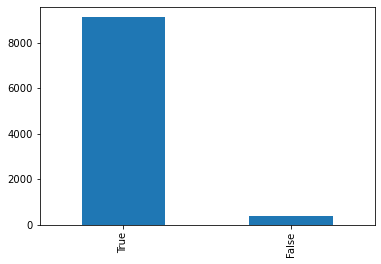

In [12]:
pd.value_counts(courses['is_paid']).plot(kind="bar")

## Current dataset

In [14]:
courses

id                                              title  \
0       762616  the_complete_sql_bootcamp_2020:_go_from_zero_t...   
1       937678  tableau_2020_a-z:_hands-on_tableau_training_fo...   
2      1361790             pmp_exam_prep_seminar_-__pmbok_guide_6   
3       648826         the_complete_financial_analyst_course_2020   
4       637930  an_entire_mba_in_1_course:award_winning_busine...   
...        ...                                                ...   
13531  3171702  máster_en_inversión_bursátil,_completo_análisi...   
13532  2925096       curso_do_zero_a_investidor_em_ações_na_bolsa   
13533  3146788  day_trading_kumo-méthode_de_trading_range-_for...   
13534  2400574              investindo_do_zero_com_tesouro_direto   
13535  2888390          acabou_a_previdência_e_agora?_-_volume_01   

                                                     url  is_paid  \
0                     /course/the-complete-sql-bootcamp/     True   
1                                     /course/tableau10/     True   
2                            /course/pmp-pmbok6-35-pdus/     True   
3         /course/the-complete-financial-analyst-course/     True   
4      /course/an-entire-mba-in-1-courseaward-winning...     True   
...                                                  ...      ...   
13531  /course/master-en-inversion-bursatil-completo-...    False   
13532  /course/curso-do-zero-a-investidor-em-acoes-na...    False   
13533  /course/day-trading-kumo-methode-de-trading-ra...    False   
13534  /course/investindo-do-zero-com-tesouro-direto-...    False   
13535    /course/acabou-a-previdencia-e-agora-volume-01/    False   

       num_subscribers  rating  num_reviews               created  
0               295509     4.7        78006  2016-02-14T22:57:48Z  
1               209070     4.6        54581  2016-08-22T12:10:18Z  
2               155282     4.6        52653  2017-09-26T16:32:48Z  
3               245860     4.5        46447  2015-10-23T13:34:35Z  
4               374836     4.5        41630  2015-10-12T06:39:46Z  
...                ...     ...          ...                   ...  
13531              485     4.4           11  2020-05-26T17:34:49Z  
13532              260     4.2           11  2020-03-28T18:39:36Z  
13533              121     4.1           10  2020-05-19T17:08:48Z  
13534              233     3.6           10  2019-06-05T23:08:57Z  
13535              175     4.5           10  2020-03-20T01:41:25Z  

[9501 rows x 8 columns]